In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [4]:
data =pd.read_excel('Credit Card Customer Data.xlsx')

In [6]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [10]:
data = data.drop(['Sl_No','Customer key'],axis=1)

KeyError: "['Customer key'] not found in axis"

In [12]:
data = data.drop(['Sl_No' ,'Customer Key'] ,axis=1)

In [14]:
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [16]:
data.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<Axes: >

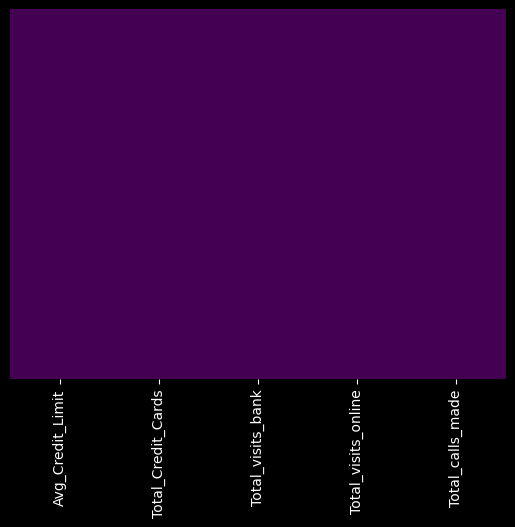

In [18]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False ,cmap='viridis')

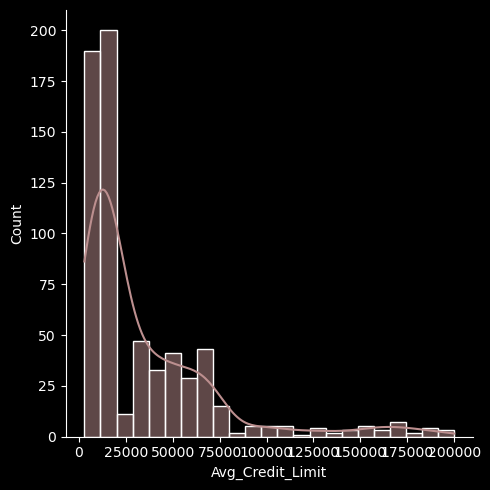

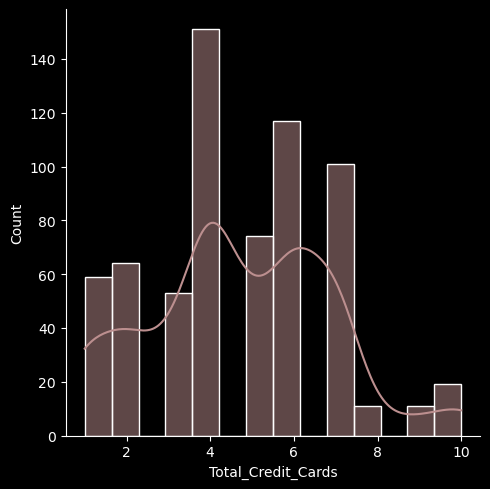

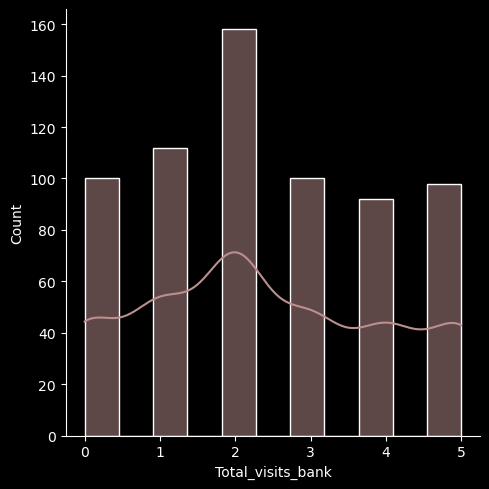

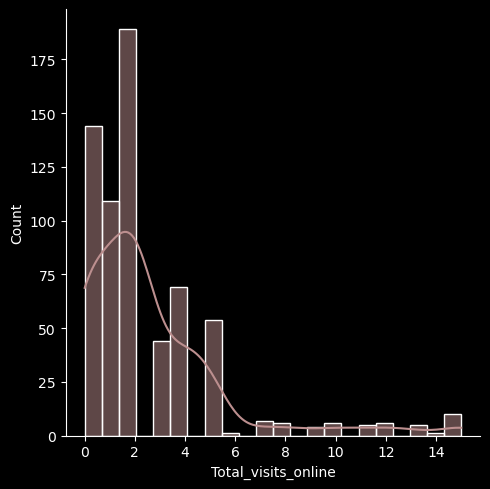

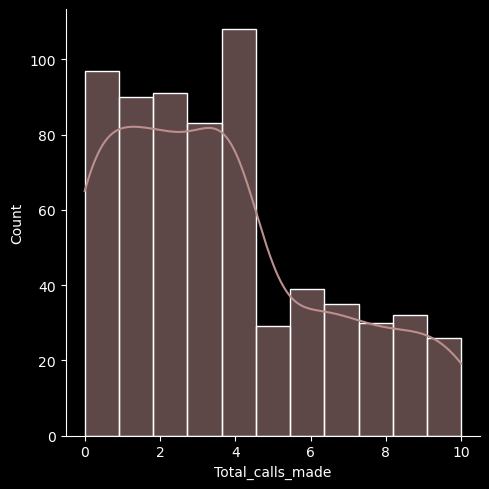

In [20]:
for feature in data.columns:
    sns.displot(data[feature],kde=True , color='rosybrown')
    plt.show()

In [22]:
features = ['Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

In [24]:
data_ = data.copy()
data_['Total_Interactions'] = data_['Total_visits_bank'] + data_['Total_visits_online'] + data_['Total_calls_made']

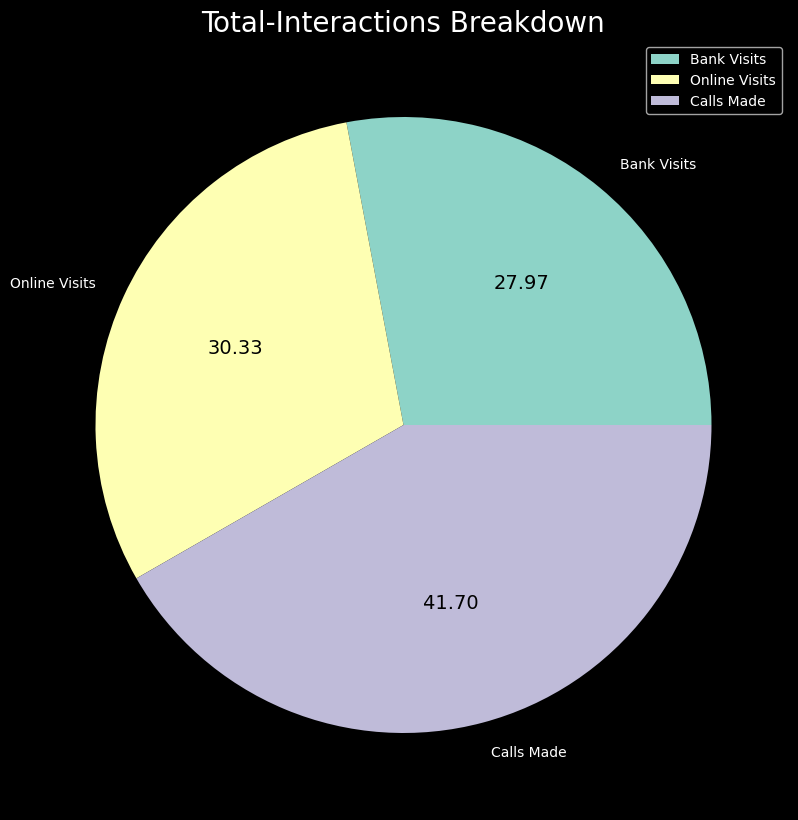

In [26]:
plt.figure(figsize=(10,10))
feature_percent = []

for feature in features: 
    feature_percent.append((data_[feature].sum() / data_['Total_Interactions'].sum()) * 100)

pathches ,texts ,autotexts = plt.pie(feature_percent,labels=['Bank Visits', 'Online Visits', 'Calls Made'] ,autopct='%1.2f' ,textprops=dict(color='w'))

plt.legend(loc='best')
plt.title('Total-Interactions Breakdown', fontsize=20)
plt.setp(autotexts, color='black', fontsize=14)
autotexts[1].set_color('black')
plt.show()

#pairplot

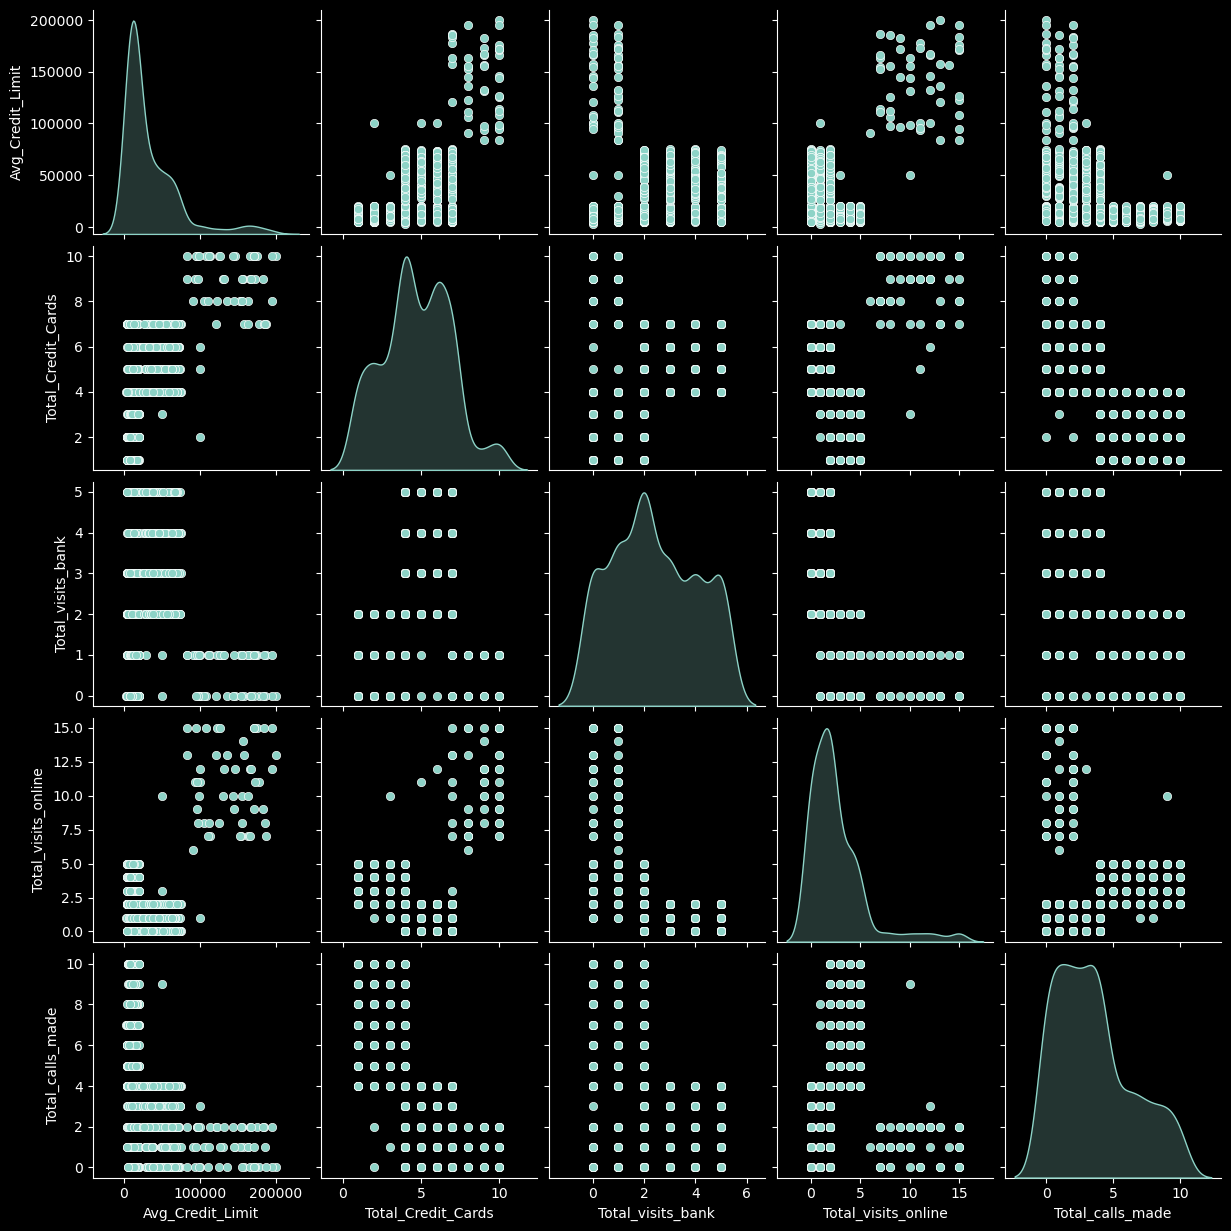

In [30]:
sns.pairplot(data ,dropna=True ,diag_kind='kde')

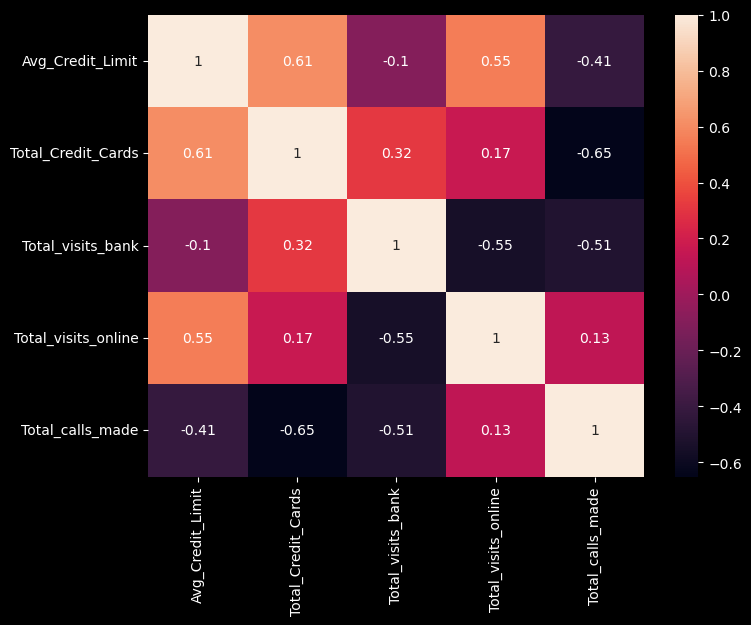

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr() ,annot=True)
plt.show()

# bivariant analysis

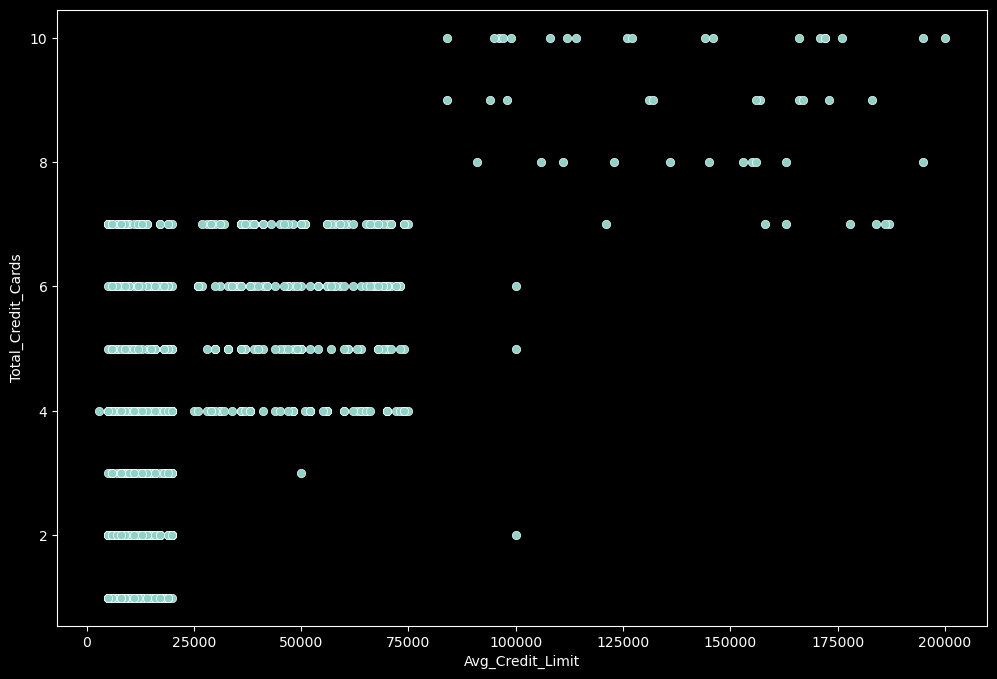

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards',data=data)
plt.show()

_There are two clusters: Customers with Average Credit Limit >100000 And Customers with Average Credit Limit < 75000_

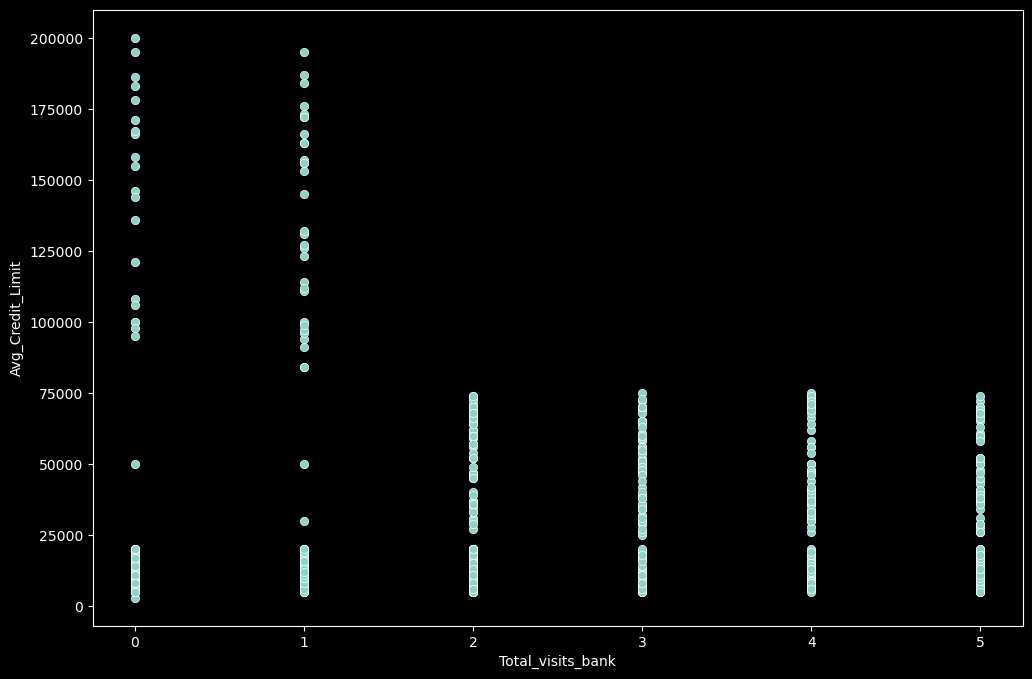

In [38]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_bank', y='Avg_Credit_Limit', data=data)
plt.show()

_People with Average Limit > ~70000 make 0 to 1 visits to the bank whereas people with Average Credit Limit < ~70000 visit frequently i.e. 2 to 5 times_

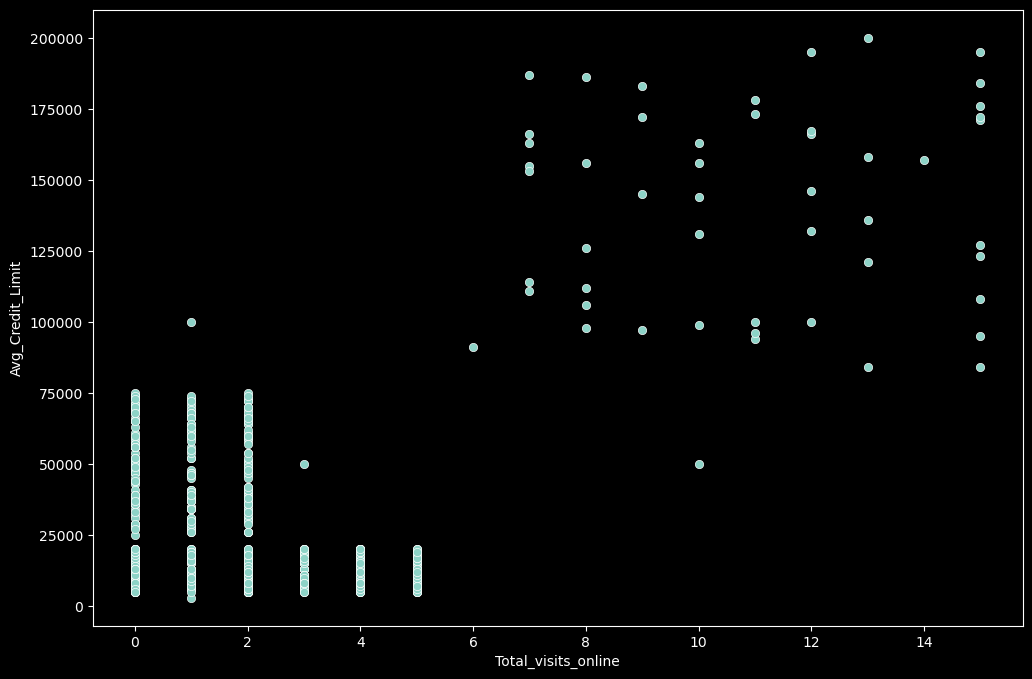

In [41]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_online', y='Avg_Credit_Limit', data=data)
plt.show()

_There are two clusters: Customers with Average Credit Limit <75000 (visiting less frequently online) & customers with Average Credit Limit > 75000 (visiting more frequently online i.e > 7 times)_

In [44]:
There are two clusters: Customers with Average Credit Limit <75000 (visiting less frequently online) & customers with Average Credit Limit > 75000 (visiting more frequently online i.e > 7 times)

SyntaxError: invalid syntax (4266569658.py, line 1)

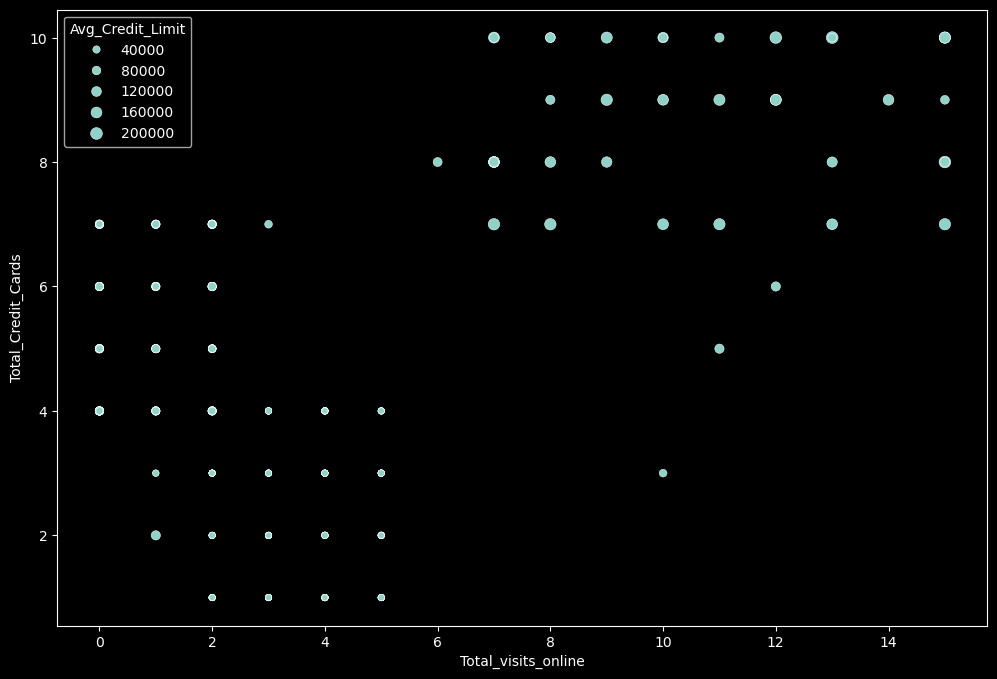

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_online', y='Total_Credit_Cards', size='Avg_Credit_Limit', data=data)
plt.show()

_There are two clusters: Customers with Credit-Cards < 7 (visiting less frequently online) & customers with Credit-Cards > 7 and average-limit > 80000 (visiting more frequently online i.e > 7 times)_

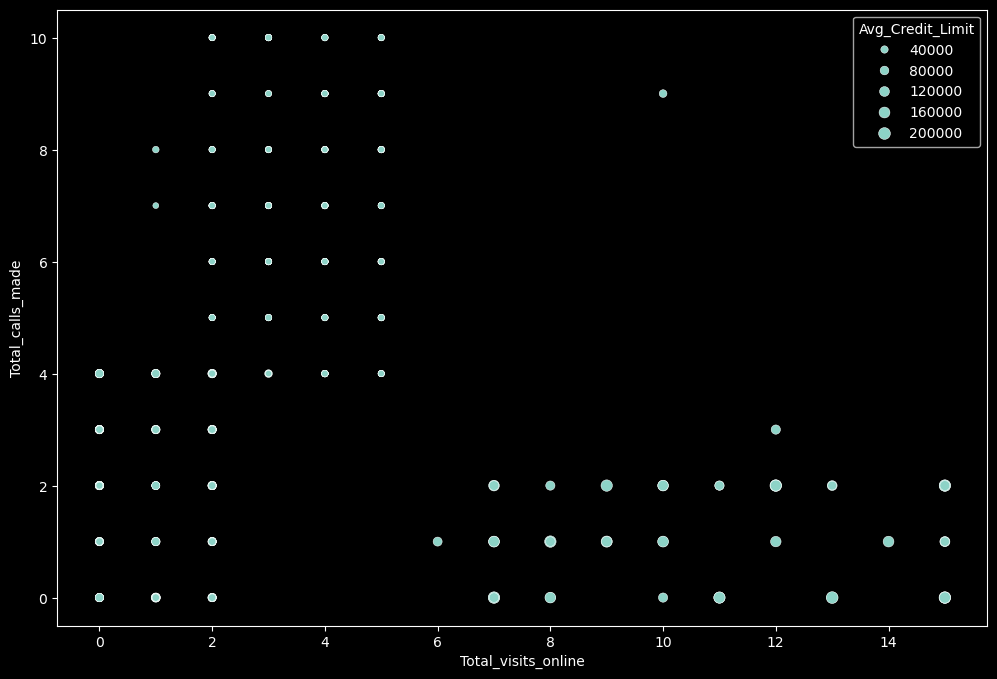

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_online', y='Total_calls_made',
                size='Avg_Credit_Limit', data=data)
plt.show()

_There are two clusters: Customers who visit less frequently online make more phone calls & customers with average-limit > 80000 (visiting more frequently online)_

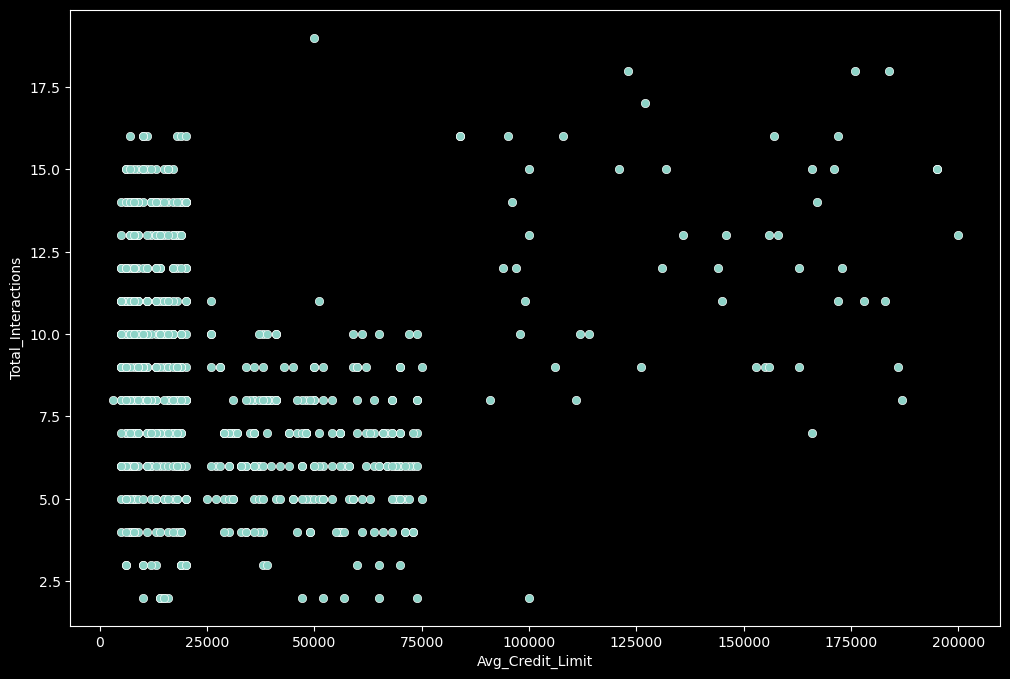

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Interactions',data=data_)
plt.show()

_Customers can be segmented on the basis of Total interactions or total complaints with bank and the average credit limit._

# scaling

In [56]:
X = data.iloc[: ,:].values
X.shape

(660, 5)

In [58]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# kmeans clustering

In [61]:
from sklearn.cluster import KMeans

L = []
for i in range(1, 20):
    model = KMeans(n_clusters=i, init='k-means++',random_state=42)
    model.fit(scaled_data)
    L.append(model.inertia_)

frame = ({'i': range(1, 20), 'L': L})

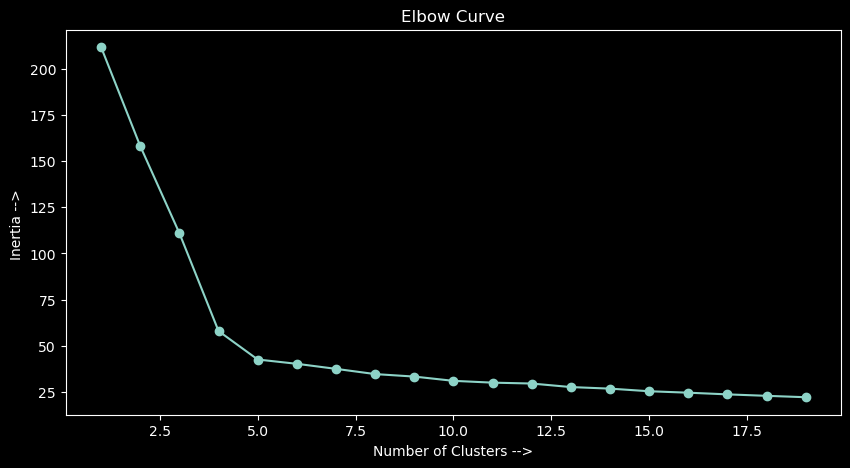

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(frame['i'], frame['L'], marker='o')
plt.xlabel('Number of Clusters -->')
plt.ylabel('Inertia --> ')
plt.title('Elbow Curve')
plt.show()

** There is smooth descent afer n_clusters = 3 ,so we will choose number of clusters as 3.**

In [71]:
model = KMeans(n_clusters=3 ,init='k-means++' ,random_state=42)
y_pred = model.fit_predict(X)

In [73]:
y_pred

array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
cluster = pd.DataFrame(y_pred ,columns=['Cluster'])
cluster

,Cluster
0,2
1,2
2,2
3,0
4,2
...,...
655,2
656,2
657,1
658,1


In [77]:
data= pd.concat([data,cluster], axis=1)

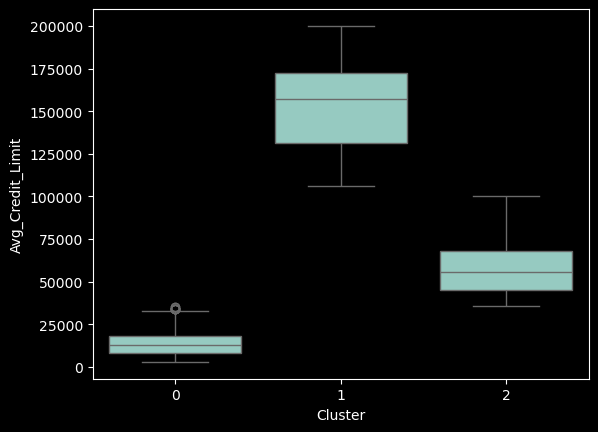

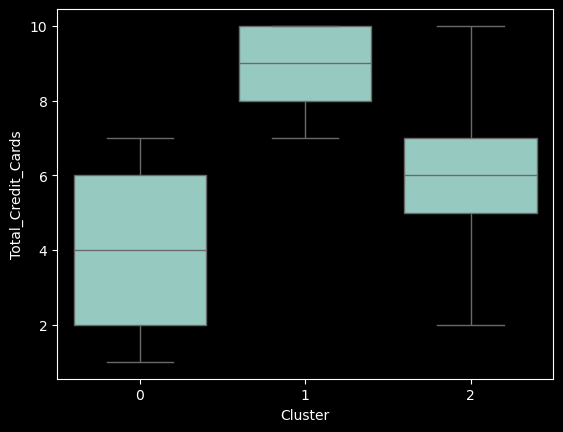

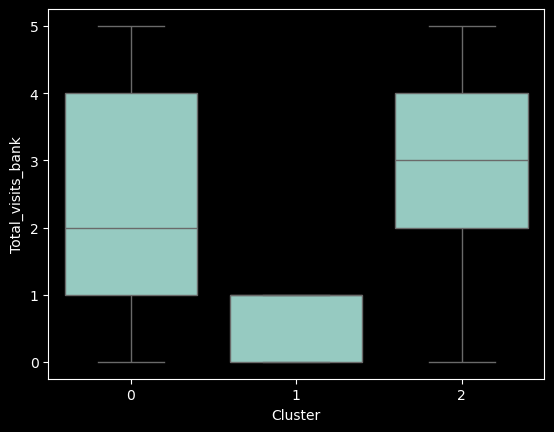

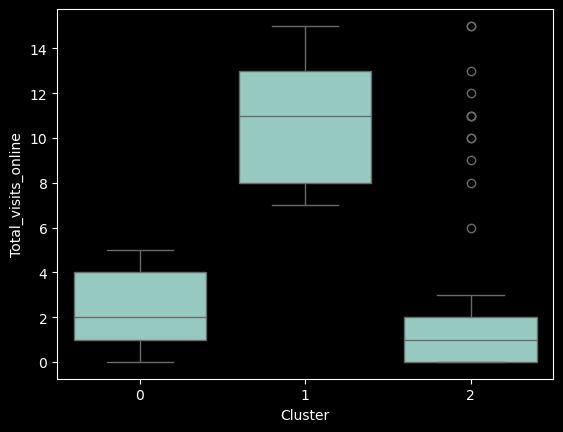

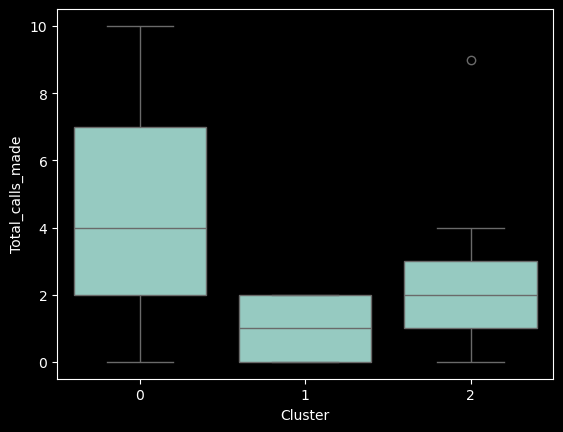

In [79]:
cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
        'Total_visits_online', 'Total_calls_made']
        
for feature in cols:
        sns.boxplot(x='Cluster', y=feature, data=data)
        plt.show()

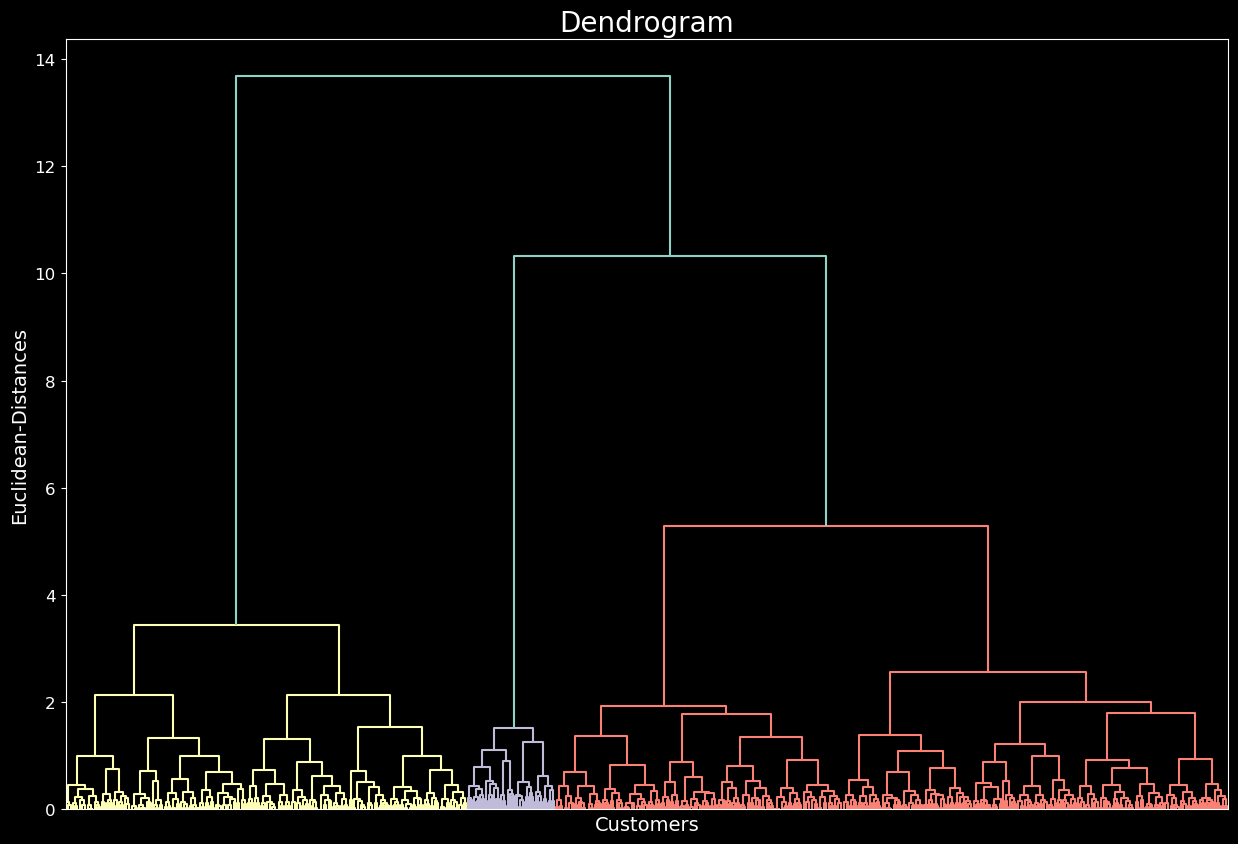

In [81]:
import scipy.cluster.hierarchy as sch 

plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(scaled_data ,method='ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customers',fontsize=14)
plt.ylabel('Euclidean-Distances',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=12)
plt.show()

In [83]:
from scipy.cluster.hierarchy import cophenet 
coph_ceff = np.mean(cophenet(sch.linkage(scaled_data)))
print('The cophenetic correlation is : {}'.format(coph_ceff))

The cophenetic correlation is : 0.21442781737262284
